# Амангелді Нұрғалым СИБ-2301

## Установка необходимых библиотек и модулей.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers

#### Создание модели №1:

##### model = tf.keras.Sequential(): Создание пустой модели нейронной сети с использованием Sequential API.
##### model.add(layers.Embedding(input_dim=1000, output_dim=64)): Добавление слоя Embedding, который преобразует целые числа (слова) в векторы размерности 64.
##### model.add(layers.LSTM(128)): Добавление слоя LSTM с 128 внутренними узлами.
##### model.add(layers.Dense(10)): Добавление полносвязного слоя с 10 узлами и активацией softmax.
##### model.summary(): Вывод информации о модели, включая количество параметров и архитектуру.

In [2]:
model = tf.keras.Sequential()
# Добавим слой Embedding ожидая на входе словарь размера 1000, и
# на выходе вложение размерностью 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Добавим слой LSTM с 128 внутренними узлами.
model.add(layers.LSTM(128))

# Добавим слой Dense с 10 узлами и активацией softmax.
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


### Создание модели №2:
#### Второй блок кода создает другую модель, используя слои GRU и SimpleRNN

In [3]:
model = tf.keras.Sequential()
model.add(layers.Embedding(input_d im=1000, output_dim=64))

# Выходом GRU будет 3D тензор размера (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# Выходом SimpleRNN будет 2D тензор размера (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 gru (GRU)                   (None, None, 256)         247296    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


### Создание модели с двумя входами и LSTM:
#### В этой части кода создается модель с двумя входами: encoder_input и decoder_input.
#### Используются слои Embedding для обоих входов.
#### Затем используется слой LSTM для кодирования входных данных и передачи состояния декодеру.
#### Модель имеет два выхода: output и состояние encoder_state.
#### model.summary() выводит информацию о структуре этой модели.

In [4]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None, ))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(encoder_input)

# Возвращает состояния в добавление к выходным данным
output, state_h, state_c = layers.LSTM(
    64, return_state=True, name='encoder')(encoder_embedded)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None, ))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(decoder_input)

# Передает 2 состояния в новый слой LSTM в качестве начального состояния
decoder_output = layers.LSTM(
    64, name='decoder')(decoder_embedded, initial_state=encoder_state)
output = layers.Dense(10)(decoder_output)

model = tf.keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 64)     64000       ['input_1[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, None, 64)     128000      ['input_2[0][0]']                
                                                                                              

## Кросс-пакетное сохранение состояния

In [7]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

# reset_states() сбосит кешированное состояние до изначального initial_state.
# Если initial_state не было задано, по умолчанию будут использованы нулевые состояния.
lstm_layer.reset_states()

## Двунаправленные RNN

In [8]:
model = tf.keras.Sequential() # Создается пустая модель нейронной сети с использованием Sequential API

model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), #В модель добавляется Bidirectional LSTM слой с 64 внутренними узлами
                               input_shape=(5, 10))) #  указывает на размер входных данных.
model.add(layers.Bidirectional(layers.LSTM(32))) #Здесь добавляется второй Bidirectional LSTM слой с 32 внутренними узлами.
model.add(layers.Dense(10)) #Добавляется полносвязный слой с 10 узлами. Этот слой используется для классификации.

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 5, 128)           38400     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


In [9]:
batch_size = 64
# Каждый пакет изображений MNIST это тензор размерностью (batch_size, 28, 28).
# Каждая входная последовательность размера (28, 28) (высота рассматривается как время).
input_dim = 28

units = 64
output_size = 10  # метки от 0 до 9

# Построим RNN модель
def build_model(allow_cudnn_kernel=True):
  # CuDNN доступен только на уровне слоя, а не на уровне ячейки.
  # Это значит `LSTM(units)` будет использовать ядро CuDNN,
  # тогда как RNN(LSTMCell(units)) будет использовать non-CuDNN ядро.
  if allow_cudnn_kernel:
    # Слой LSTM с параметрами по умолчанию использует CuDNN.
    lstm_layer = tf.keras.layers.LSTM(units, input_shape=(None, input_dim))
  else:
    # Обертка LSTMCell слоем RNN не будет использовать CuDNN.
    lstm_layer = tf.keras.layers.RNN(
        tf.keras.layers.LSTMCell(units),
        input_shape=(None, input_dim))
  model = tf.keras.models.Sequential([
      lstm_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size)]
  )
  return model

## Загрузка датасета MNIST

In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

11490434/11490434 [==============================] - 20s 2us/step


### Данные нормализуются путем деления на 255.0 для масштабирования значений в интервал [0, 1].
### Создается модель, используя функцию build_model, и компилируется для обучения. В этом случае используется Sparse Categorical Crossentropy в качестве функции потерь и оптимизатор SGD.
### Модель обучается на обучающем наборе данных MNIST в течение 5 эпох с использованием пакетов данных размером batch_size.

In [11]:
model = build_model(allow_cudnn_kernel=True)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='sgd',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=5)

Epoch 1/5
938/938 [==============================] - 26s 21ms/step - loss: 0.9314 - accuracy: 0.7083 - val_loss: 0.6702 - val_accuracy: 0.7690
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.3706 - accuracy: 0.8892 - val_loss: 0.3647 - val_accuracy: 0.8800
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.2490 - accuracy: 0.9247 - val_loss: 0.3777 - val_accuracy: 0.8773
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1952 - accuracy: 0.9408 - val_loss: 0.1711 - val_accuracy: 0.9453
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1639 - accuracy: 0.9501 - val_loss: 0.1972 - val_accuracy: 0.9352


### Здесь создается дополнительная модель slow_model, которая по сути является копией предыдущей модели. Однако она настроена так, чтобы не использовать оптимизированные ядра CuDNN (установлен флаг allow_cudnn_kernel=False).
### Веса slow_model устанавливаются равными весам из исходной модели model с помощью slow_model.set_weights(model.get_weights()).
#### slow_model компилируется и обучается только в течение одной эпохи, так как это медленный вариант.

In [13]:
slow_model = build_model(allow_cudnn_kernel=False)
slow_model.set_weights(model.get_weights())
slow_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                   optimizer='sgd', 
                   metrics=['accuracy'])
slow_model.fit(x_train, y_train, 
               validation_data=(x_test, y_test), 
               batch_size=batch_size,
               epochs=1)  # Обучим только за одну эпоху потому что она медленная.

938/938 [==============================] - 20s 19ms/step - loss: 0.1441 - accuracy: 0.9572 - val_loss: 0.1681 - val_accuracy: 0.9472


### В этом блоке кода определяется, что выполнение следующих операций будет происходить на центральном процессоре (CPU:0).
### Создается модель cpu_model, которая снова является копией исходной модели model с использованием оптимизированных ядер CuDNN (установлен флаг allow_cudnn_kernel=True).

Predicted result is: [5], target result is: 5


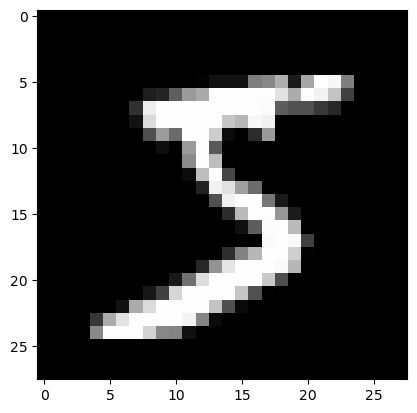

In [14]:
with tf.device('CPU:0'):
  cpu_model = build_model(allow_cudnn_kernel=True)
  cpu_model.set_weights(model.get_weights())
  result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
  print('Predicted result is: %s, target result is: %s' % (result.numpy(), sample_label))
  plt.imshow(sample, cmap=plt.get_cmap('gray'))

## Создание пользовательской RNN ячейки и обучение на данных:

In [15]:
NestedInput = collections.namedtuple('NestedInput', ['feature1', 'feature2'])
NestedState = collections.namedtuple('NestedState', ['state1', 'state2'])

class NestedCell(tf.keras.layers.Layer):

  def __init__(self, unit_1, unit_2, unit_3, **kwargs):
    self.unit_1 = unit_1
    self.unit_2 = unit_2
    self.unit_3 = unit_3
    self.state_size = NestedState(state1=unit_1, 
                                  state2=tf.TensorShape([unit_2, unit_3]))
    self.output_size = (unit_1, tf.TensorShape([unit_2, unit_3]))
    super(NestedCell, self).__init__(**kwargs)

  def build(self, input_shapes):
    # # ожидает input_shape содержащий 2 элемента, [(batch, i1), (batch, i2, i3)]
    input_1 = input_shapes.feature1[1]
    input_2, input_3 = input_shapes.feature2[1:]

    self.kernel_1 = self.add_weight(
        shape=(input_1, self.unit_1), initializer='uniform', name='kernel_1')
    self.kernel_2_3 = self.add_weight(
        shape=(input_2, input_3, self.unit_2, self.unit_3),
        initializer='uniform',
        name='kernel_2_3')

  def call(self, inputs, states):
    # входы должны быть в [(batch, input_1), (batch, input_2, input_3)]
    # состояние должно быть размерностью [(batch, unit_1), (batch, unit_2, unit_3)]
    input_1, input_2 = tf.nest.flatten(inputs)
    s1, s2 = states

    output_1 = tf.matmul(input_1, self.kernel_1)
    output_2_3 = tf.einsum('bij,ijkl->bkl', input_2, self.kernel_2_3)
    state_1 = s1 + output_1
    state_2_3 = s2 + output_2_3

    output = [output_1, output_2_3]
    new_states = NestedState(state1=state_1, state2=state_2_3)

    return output, new_states

## Постройте модель RNN с вложенными входом/выходом

In [17]:
unit_1 = 10
unit_2 = 20
unit_3 = 30

input_1 = 32
input_2 = 64
input_3 = 32
batch_size = 64
num_batch = 100
timestep = 50

cell = NestedCell(unit_1, unit_2, unit_3)
rnn = tf.keras.layers.RNN(cell)

inp_1 = tf.keras.Input((None, input_1))
inp_2 = tf.keras.Input((None, input_2, input_3))

outputs = rnn(NestedInput(feature1=inp_1, feature2=inp_2))

model = tf.keras.models.Model([inp_1, inp_2], outputs)

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## Обучение модели на случайных данных:

In [18]:
input_1_data = np.random.random((batch_size * num_batch, timestep, input_1))
input_2_data = np.random.random((batch_size * num_batch, timestep, input_2, input_3))
target_1_data = np.random.random((batch_size * num_batch, unit_1))
target_2_data = np.random.random((batch_size * num_batch, unit_2, unit_3))
input_data = [input_1_data, input_2_data]
target_data = [target_1_data, target_2_data]

model.fit(input_data, target_data, batch_size=batch_size)

100/100 [==============================] - 221s 2s/step - loss: 0.3917 - rnn_1_loss: 0.1317 - rnn_1_1_loss: 0.2600 - rnn_1_accuracy: 0.0972 - rnn_1_1_accuracy: 0.0344


## rnn_1_accuracy: 0.0972 , то есть точность - 97,2%